In [1]:
from nltk.corpus import words
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special

In [2]:
words_pd = pd.DataFrame()
words_pd['word'] = words.words()
# Remove words that are stored both in lower and upper case 
words_pd['lower_case'] = words_pd['word'].map(str.lower)
words_pd = words_pd.drop_duplicates('lower_case')
# Count number of characters
words_pd['length'] = words_pd['word'].map(len)

In [3]:
words_pd

,word,lower_case,length
0,A,a,1
2,aa,aa,2
3,aal,aal,3
4,aalii,aalii,5
5,aam,aam,3
...,...,...,...
235972,box,box,3
236028,colour,colour,6
236210,harbour,harbour,7
236236,humour,humour,6


In [4]:
length = words_pd.groupby('length').agg(count = ('word', 'count'))

In [5]:
words_pd.describe()

,length
count,234377.000000
mean,9.591581
std,2.916587
min,1.000000
25%,8.000000
50%,9.000000
75%,11.000000
max,24.000000


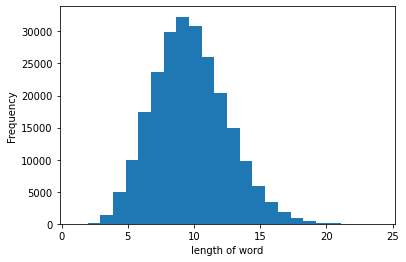

In [6]:
words_pd.plot(kind='hist', legend=False, bins=24)
plt.xlabel('length of word')
plt.show()

### Calculate number of possible combinations based on the English Alphabet
To calculate the combination to choose a set of $k$ letters (with repetitions) from the $n=26$ letters of the English alphabet, one must use
\begin{equation} \left(\!\!{\binom {n}{k}}\!\!\right)={\binom {n+k-1}{k}}.
\end{equation}

In [7]:
n = 26
combinations = lambda k : scipy.special.binom(n + k - 1, k)
theoretical_combinations = [combinations(k) for k in range(1,25)]

In [8]:
length['theoretical_combinations'] = theoretical_combinations
length['ratio'] = length['count']/length['theoretical_combinations']

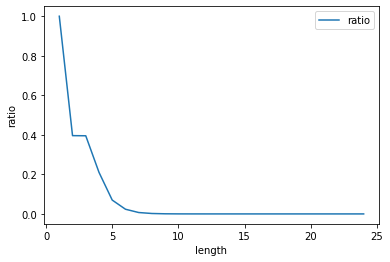

In [9]:
length.plot(y='ratio', ylabel='ratio')
plt.show()


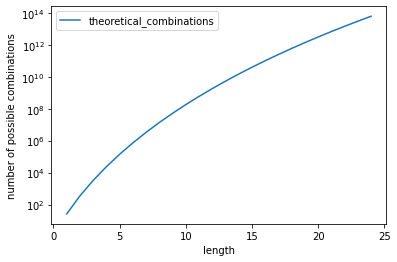

In [10]:
length.plot(y='theoretical_combinations', logy=True, ylabel='number of possible combinations')
plt.show()